<a href="https://colab.research.google.com/github/YgZINTJ/STAT3011_project/blob/main/dataVisualisation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
# @title Packages
import importlib
import pip

def import_or_install(package, alias=None):
    try:
        # Try to import the package
        module = importlib.import_module(package)
    except ImportError:
        # If the package is not installed, install it using pip
        pip.main(['install', package])
        # Import the module after installation
        module = importlib.import_module(package)

    # Assign the module to the specified alias if provided
    if alias:
        globals()[alias] = module
    else:
        globals()[package] = module

#importing packages
import_or_install('matplotlib.pyplot', alias='plt')
import_or_install('pandas', alias='pd')
import_or_install('seaborn', alias='sns')
import_or_install('numpy', alias='sp')
import_or_install('squarify')
import_or_install('plotly.express', alias='px')
import_or_install('pgeocode')

In [177]:
# @title Downloading datasheet
data_url = 'https://raw.githubusercontent.com/YgZINTJ/STAT3011_project/refs/heads/main/Dog_Bites_Data.csv'
df = pd.read_csv(data_url)


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   UniqueID    22663 non-null  int64         
 1   DateOfBite  22663 non-null  datetime64[ns]
 2   Species     22663 non-null  object        
 3   Breed       22663 non-null  object        
 4   Age         22663 non-null  object        
 5   Gender      22663 non-null  object        
 6   SpayNeuter  22663 non-null  bool          
 7   Borough     22663 non-null  object        
 8   ZipCode     22663 non-null  object        
 9   Year        22663 non-null  int32         
 10  Month       22663 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(2), int64(1), object(6)
memory usage: 1.6+ MB


In [181]:
df.isnull().sum()

,0
UniqueID,0
DateOfBite,0
Species,0
Breed,0
Age,0
Gender,0
SpayNeuter,0
Borough,0
ZipCode,0
Year,0


In [ ]:
#@title Cleaning Data
df['DateOfBite'] = pd.to_datetime(df['DateOfBite'])
df['Year'] = df['DateOfBite'].dt.year
df['Month'] = df['DateOfBite'].dt.month

df.Breed.fillna('Unspecified', inplace= True)
df.Breed.replace(to_replace = 'UNKNOWN', value = 'Unspecified', inplace = True)
df.Age.fillna('Not_Given', inplace= True)
df.ZipCode.fillna('Not_Provided', inplace= True)

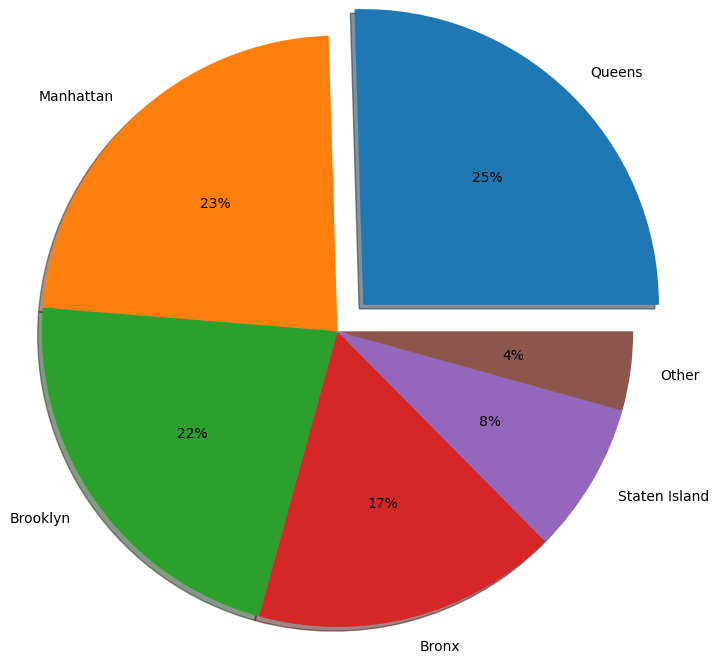

In [10]:
# @title The Pie Chart Solving Problem ONE
# Question: Which suburben has the highest cases reported?
value_counts = df['Borough'].value_counts()

df_value_counts = value_counts.reset_index()

df_value_counts.columns = ['Borough', 'Count']

plt.pie(value_counts,
        labels = df_value_counts['Borough'],
        autopct ='%1.0f%%',
        radius = 2.0,
        explode = (value_counts == max(value_counts)) * 0.25,
        shadow = True)
plt.show()

In [ ]:
# @title Anuually Bite Case According to Breed
# Question: What seems to be the breed of dog that is most likly to bite?

df_breed_counts = df.groupby(['Breed', 'Year']).size().reset_index(name='Count')

df_pivot = df_breed_counts.pivot(index='Year',
                                 columns='Breed',
                                 values='Count').reset_index()

df_melted = pd.melt(df_pivot,
                    id_vars=['Year'],
                    value_vars=df_pivot.columns[1:],
                    var_name='Breed',
                    value_name='Count')

df_melted.fillna(0, inplace = True)

df_meltedAndFilted = df_melted[(df_melted['Count']>=50) & (df_melted['Breed'] != 'Unspecified')]


fig = px.line(df_meltedAndFilted, x='Year', y='Count', color='Breed', markers=True,
              title='Reported Dog Bite Cases by Breed and Year',
              labels={'Count': 'Number of Reported Cases'},
              hover_name='Breed', hover_data={'Year': True, 'Count': True})

# Show the plot
fig.show()

In [49]:
# @title  Third
# Question : Are bite cases relevent to seasons?

month_count = df['Month'].value_counts()
month_count.columns = ['Month', 'Count']
month_count.sort_index(inplace = True)
df_month_count = month_count.reset_index()
df_month_count.columns = ['Month', 'Count']

df_month_count2 = df_month_count.assign(Month_Name = ['January', 'February',
                                                      'March', 'April', 'May',
                                                      'June', 'July', 'August',
                                                      'September', 'October',
                                                      'November', 'December'])

fig2 = px.bar(df_month_count2, x='Month_Name', y='Count',

              labels={'Count': 'Number of Reported Cases'},
              hover_name='Month_Name', hover_data={'Month_Name': True, 'Count': True},
              text_auto='.2s')
fig2.update_layout(title='Reported Dog Bite Cases by Month in 5 Years',
                    xaxis = dict(title = 'Month'),
                    yaxis = dict(title = 'Number of Reported Cases'),
                   title_x = 0.5)
fig2.show()


In [99]:
#@title Fourth
# Question : What are the

# Data modifying section
SpayNeuter_count = df.groupby(['Breed', 'SpayNeuter']).size().reset_index(name='Count')
breeds_with_both = SpayNeuter_count.groupby('Breed')['SpayNeuter'].nunique()
breeds_with_both = breeds_with_both[breeds_with_both == 2].index
SpayNeuter_count_filtered = SpayNeuter_count[SpayNeuter_count['Breed'].isin(breeds_with_both)]
breeds_with_min_count = SpayNeuter_count_filtered.groupby('Breed')['Count'].min()
breeds_with_min_count = breeds_with_min_count[breeds_with_min_count >= 20].index
SpayNeuter_count_filtered_final = SpayNeuter_count_filtered[SpayNeuter_count_filtered['Breed'].isin(breeds_with_min_count)]


fig3 = px.bar(SpayNeuter_count_filtered_final,
              x = 'SpayNeuter',
              y = 'Count',
              text = 'Breed',
              color = 'Breed')
fig3.update_layout(title='Reported Dog Bite Cases by Breed and Spay/Neuter',
                    xaxis = dict(title = 'Breed'),
                    yaxis = dict(title = 'Number of Reported Cases'),
                   title_x = 0.5)

# Set opacity of all traces to 0 (invisible)
fig3.update_traces(opacity=1)

# Add dropdown menu to control visibility
fig3.update_layout(
    title='Reported Dog Bite Cases by Breed and Spay/Neuter',
    xaxis_title="Spay/Neuter Status",
    yaxis_title="Number of Reported Cases",
    title_x=0.5,
    updatemenus=[{
        'buttons': [
            {
                'label': 'Show All',
                'method': 'update',
                'args': [{'visible': [True] * len(fig3.data)},  # Show all traces
                         {'title': 'All Breeds Visible'}]
            }
        ] + [
            {
                'label': breed,
                'method': 'update',
                'args': [{'visible': [trace.name == breed for trace in fig3.data]},  # Show only selected breed
                         {'title': f'Only {breed} Visible'}]
            } for breed in SpayNeuter_count_filtered_final['Breed'].unique()
        ],
        'direction': 'down',
        'showactive': True,
    }]
)


fig3.show()

In [ ]:
#@title Converting ZipCode to Location Data (View ONLY!!!!)
# NOTE: THIS CELL TAKES AROUND 3 MINS TO FINISH, CSV Generated in next cell, DO NOT EXCUTE IT AGAIN
df['ZipCode'] = df['ZipCode'].astype(str).str.zfill(5)
df_zipcode = df['ZipCode'][(df['ZipCode'] != 'Not_Provided') &
                                 (df['ZipCode'] != '?')]
df_zipcode = pd.DataFrame(df_zipcode)

zipcode_list = []

nomi = pgeocode.Nominatim('us')

def fetch_location_data(zipcode):
    data = nomi.query_postal_code(zipcode)
    if data is not None:
        return {"ZipCode": zipcode, "Latitude": data.latitude, "Longitude": data.longitude}
    else:
        return {"ZipCode": zipcode, "Latitude": None, "Longitude": None}


location_df = df_zipcode['ZipCode'].apply(fetch_location_data).apply(pd.Series)









In [204]:
#@title Storing Location Data (View Only)
location_df.to_csv('location_df.csv', index=False)

In [ ]:
#@title Map
# Question:
location_url = 'https://raw.githubusercontent.com/YgZINTJ/STAT3011_project/refs/heads/main/location_df.csv'
location_df = pd.read_csv(location_url)

location_count = location_df.groupby(['ZipCode','Latitude','Longitude']).size().reset_index(name='Count')

fig4 = px.scatter_map(location_count,
                      lat="Latitude",
                      lon="Longitude",
                      color="Count",
                      size="Count",
                      color_continuous_scale = px.colors.cyclical.IceFire,
                      size_max=15,
                      zoom=10)
fig4.update_layout(title='Reported Dog Bite Cases Map in 5 Years',title_x = 0.5)
fig4.show()